In [1]:
%%javascript
IPython.load_extensions('usability/runtools/main')
IPython.load_extensions('usability/aspell/main')

<IPython.core.display.Javascript object>

In [1]:
%matplotlib inline
from path import path

### Technological Development Action (ADT)
# Scientific COmpOnents for plant Phenotyping (SCOOP)

* Pierre Fernique
* Yann Guédon
* Christophe Pradal

* Guillaume Baty
* Frédéric Boudon
* Jean-Baptiste Durand
* Jean Peyhardi

### Introduction
# Scientific context

In plant phenotyping researchers mainly use classical statistical models and non-standart databases.

Under the assumption that plant is a complex organism, structured at different scale and regulated by environmental factors, **Virtual Plants** team has developed a set of methods

* Multi-scale Tree Graph (*MTG*), as plant database.
* *PlantGL*, for $3$D visualization of plants.
* *LPy*, a L-system based module for plant simulation.
* *StatTools*, *SequenceAnalysis*, *TreeMatching* and *TreeStatistics* for structured statistical analysis.

### Introduction
# Technological context

Historically, **VPlants** packages were interfaced with the *AML* language.

This *AML* language has been replaced by *Python* and packages integrated in the *OpenAlea* platform.

| Library     | Source   | Interface                                     |
|-------------|----------|-----------------------------------------------|
| *MTG*       | *Python* | <span style="color:green;" > *Python* </span> |
| *PlantGL*   | *C++*    | <span style="color:green;" > *Python* </span> |
| *LPy*       | *C++*    | <span style="color:green;" > *Python* </span> |
| *StatTools* | *C++*    | <span style="color:red;" > AMLPy </span>      |

Nevertheless, some packages are fully interfaced with *Python* and some are only interfaced with *Python* using a *Python* interpretor of the *AML* Language.


### Introduction
# Aims

Interfacing *C/C++* libraries with *Python* is costly

| Library     | Source code | Wrappers    | Ratio  |
|-------------|-------------|------------ |---------|
| *PlantGL*   | $127,172$   | $9,303$     | $0.07$ |
| *Lpy*       | $12,236$    | $1,628$     | $0.12$ |
| *Statistic* | $21,142$    | $3,883$     | $0.16$ |
| *StatisKit* | $31,184$    | $5,120$     | $0.14$ |

* Specifying a *C/C++* norm in order to automatically produce *Python* wrappers.
* Specifying a *Python* interface norm and compatibility with usual *Python* packages (matplotlib, pandas...).

### Introduction
# Roadmap
#### Distribution

![Roadmap](./vplants_seminar-15.05.04/roadmap-1.png)

### Introduction
# Roadmap
#### Distribution

Considered actions :

* One week courses to promote packages in the phenotyping community.
* Articles to promote packages in statistical and other applied communities.
* Apply to EuroScipy conference in order to present the automatic generation of *Python* bindings for *C/C++* libraries.

### Introduction
# Roadmap
####  Continuous integration & Documentation & Website

![Roadmap](./vplants_seminar-15.05.04/roadmap-2.png)

### Introduction
# Roadmap
####  Continuous integration & Documentation & Website

Two task in collaboration with G. Baty:

*   The website on github.
    Public releases on GitHub and private releases on Inria GForge Inria.

*   Using the Inria continuous integration system (Jenkins). 
    Automatic compilation, testing (preventing code regression) and documentation generation (up-to-date documentation).

One with libraries authors:

*   Each author write its own documentation.
    Coordination and formation to different tools.

### Introduction
# Roadmap
#### Interface with visualization tools (*R* or *Python*)

![Roadmap](./vplants_seminar-15.05.04/roadmap-3.png)

### Introduction
# Roadmap
#### Interface with visualization tools (*R* or *Python*)

*C/C++* libraries interfaced in *Python* can benefit from other *Python* packages such as :

* *matplotlib*, Integrated to *OpenAlea* and *IPython Notebook*, used for $2$D and $3$D statistical plots.
* *networkx* for graph plots (Markov diagram, memory tree...).
* *pandas* compatibility with with common *Python* and/or *R* dataframes.
* ...

### Introduction
# Roadmap
#### Bibliothèques disponibles nativement en *Python* et *R* & *DTK* portability

![Roadmap](./vplants_seminar-15.05.04/roadmap-4.png)

### Introduction
# Roadmap
#### Interfacing libraries in *Python* and *R*  & *DTK* portability

Interfacing *StatTools*, *SequenceAnalysis*, *TreeStatistic* and *TreeMatching* in *Python* and *R*:

* Unitary tests,
* "Pythonic" API design, 
* Reference documentation.

Statistical abstraction for *DTK* representing designs patterns implemented in *VPlants* for sharing available tools between differents Inria team.

### Introduction
# Roadmap
#### Automatic wrapping of *C/C++* libraries in *Python* et *R* & *C/C++* libraries norms in *OpenAlea*

![Roadmap](./vplants_seminar-15.05.04/roadmap-5.png)

### Introduction
# Roadmap
#### Automatic wrapping of *C/C++* libraries in *Python* et *R* & *C/C++* libraries norms in *OpenAlea* desing

The automatic wrapping of *C/C++* libraries relies on:
* A package for wrapping libraries in *Python* automatically using the *Boost.Python* library.
* The automatic extraction of libraries reference documentation for *Python* interface.
* Integration of these procedures into the compilation chain.

The norm design is based on :
* The limitations of the automatic wrapping procedures.
* Errors management.

# Generation of *Python* bindings for *C* libraries

### Generation of *Python* bindings for *C* libraries
# The *C* language
#### Principle

*C* can be viewed as a subset of *C++* language that is not object-oriented language such as *Python*.

*C* is a general-purpose, imperative computer programming language.
It supports structured programming, lexical variable scope and recursion, while a static type system prevents many unintended operations.

By design, C provides constructs that map efficiently to typical machine instructions, and therefore it has found lasting use in applications that had formerly been coded in assembly language, including operating systems, as well as various application software for computers ranging from supercomputers to embedded systems.

### Generation of *Python* bindings for *C* libraries
# The *C* language and *Python* bindings
#### Fundamental types

<table class="boxed", align="center">
<tbody><tr><th>Group</th><th>Type names</th><th rowspan="11"><th>Group</th><th>Type names</th></tr>
<tr><td>Void type</td><td><code>void</code></td><td>Boolean type</td><td><code>bool</code></td></tr>
<tr><td rowspan="4">Character types</td><td><code>char</code></td><td rowspan="5">Integer types (unsigned)</td><td><code>unsigned char</code></td></tr>
<tr><td><code>char16_t</code></td><td><code>unsigned short <i>int</i></code></td></tr>
<tr><td><code>char32_t</code></td><td><code>unsigned <i>int</i></code></td></tr>
<tr><td><code>wchar_t</code></td><td><code>unsigned long <i>int</i></code></td></tr>
<tr><td rowspan="5">Integer types (signed)</td><td><code>char</code></td><td><code>unsigned long long <i>int</i></code></td></tr>
<tr><td><code>short <i>int</i></code></td><td rowspan="3">Floating-point types</td><td><code>float</code></td></tr>
<tr><td><code>int</code></td><td><code>double</code></td></tr>
<tr><td><code>long <i>int</i></code></td><td><code>long double</code></td></tr>
<tr><td><code>long long <i>int</i></code></td><td>Null pointer</td><td><code>decltype(nullptr)</code></td></tr>
</tbody></table>

In [3]:
from pygments import highlight
from pygments.lexers import CLexer, CppLexer
from pygments.formatters import HtmlFormatter
from IPython.display import HTML

### Generation of *Python* bindings for *C* libraries
# The *C* language and *Python* bindings
#### User defined types - Enumerated type

An enumerated type is a data type consisting of a set of named values called elements, members or enumerators of the type. 

The enumerator names are usually identifiers that behave as constants in the language.

In [4]:
HTML(highlight('enum c_enum_name\n{\n\tc_value_name_0,\n\tc_value_name_1\n};', CLexer(), HtmlFormatter(full = True)))

### Generation of *Python* bindings for *C* libraries
# The *C* language and *Python* bindings
#### User defined types - Enumerated type

These enumerated are wrapped using the following *Boost.Python* code:

In [5]:
HTML(highlight('boost::python::enum_< c_enum_name >(\"py_enum_name\")\n\t.value(\"py_value_name_0\", c_value_name_0)\n\t.value(\"py_value_name_1\", c_value_name_1)\n\t;', CLexer(), HtmlFormatter(full = True)))

No particular requierement since it is using only strings and integers already wrapped by *Boost.Python*

### Generation of *Python* bindings for *C* libraries
# The *C* language and *Python* bindings
#### User defined types - structures

A structure is a complex data type declaration that defines a physically grouped list of variables to be placed under one name in a block of memory, allowing the different variables to be accessed via a single pointer, or the struct declared name which returns the same address.

In [6]:
HTML(highlight('struct _c_struct_name\n{\n\tint c_field_name_0;\n\tconst double c_field_name_1;\n};\n\ntypedef struct _c_struct_name c_struct_name;', CLexer(), HtmlFormatter(full = True)))

### Generation of *Python* bindings for *C* libraries
# The *C* language and *Python* bindings
#### User defined types - structures

These structures are wrapped using the following *Boost.Python* code:

In [7]:
HTML(highlight('boost::python::class_< c_struct_name, c_struct_name * >\n\t("py_struct_name", boost::python::no_init)\n\t.readwrite(\"py_field_name_0\", &c_struct_name::c_field_name_0)\n\t.readonly(\"py_filed_name_1\", &c_struct_name::c_field_name_1)\n\t;', CLexer(), HtmlFormatter(full = True)))

Require:

* `typedef` used to eliminate the need for the struct keyword in *C*.
* All field types must be wrapped.
    

### Generation of *Python* bindings for *C* libraries
# The *C* language and *Python* bindings
#### User defined types - unions

In *C*, untagged unions are expressed nearly exactly like structures, except that each data member begins at the same location in memory.

In [8]:
HTML(highlight('struct c_union_name\n{\n\tint c_field_name_0;\n\tdouble c_field_name_1;\n};', CLexer(), HtmlFormatter(full = True)))

### Generation of *Python* bindings for *C* libraries
# The *C* language and *Python* bindings
#### User defined types - unions

These unions are wrapped using the following *Boost.Python* code:

In [9]:
HTML(highlight('boost::python::class_< c_union_name, c_union_name * >\n\t("py_union_name", boost::python::no_init)\n\t.def_readwrite(\"py_field_name_0\", &c_struct_name::c_field_name_0)\n\t.def_readwrite(\"py_filed_name_1\", &c_struct_name::c_field_name_1)\n\t;', CLexer(), HtmlFormatter(full = True)))

As for structures, all field types must be wrapped.

### Generation of *Python* bindings for *C* libraries
# The *C* language and *Python* bindings
#### Variables and functions

A variable is nothing but a name given to a storage area,

In [10]:
HTML(highlight('int c_var_name_0;\nconst double c_var_name_1;', CLexer(), HtmlFormatter(full = True)))

A function is a group of statements that together perform a task. 
A function as a result type and  parameters.

In [11]:
HTML(highlight('void func_name_0();\n int func_name_1(const double& parameter);', CLexer(), HtmlFormatter(full = True)))

### Generation of *Python* bindings for *C* libraries
# The *C* language and *Python* bindings
#### Variables and functions

Variables are wrapped using the following *Boost.Python* code:

In [12]:
HTML(highlight('boost::python::scope().attr("py_var_name_0", c_var_name_0);\nboost::python::scope().attr("py_var_name_1", c_var_name_1);', CLexer(), HtmlFormatter(full = True)))

and functions with the following *Boost.Python* code:

In [13]:
HTML(highlight('boost::python::def("py_function_name_0", c_func_name_0);\nboost::python::def("py_func_name_1", c_func_name_1);', CLexer(), HtmlFormatter(full = True)))

### Generation of Python bindings for *C* libraries
# Toward an automatic process
#### A few words on the compilation process

A compiler consists of:

*   The front end that verifies syntax and semantics, and generates an Intermediate Representation (IR).
*   The middle end that performs optimizations, including removal of useless or unreachable code...
*   The back end that generates the assembly code....

The same principle will be used for the automatic process

<div align="center">
Front end &#8658; Middle end &#8658; Back end
</div>

were we use

<div align="center">
Compilator IR &#8658; Custom IR &#8658; Wrapper templates
</div>

with customizable wrapper templates.

### Generation of Python bindings for *C* libraries
# Toward an automatic process
#### A few words on the compilation process

In the case of **[Clang](http://clang.llvm.org/docs/index.html)**, the intermediate representation of the source code for processing by the middle-end are **Abstract Syntax Trees (ASTs)**.

**ASTs** are tree representations of the abstract syntactic structure of source code. These **ASTs** are available in *Python* when using *libclang*.

Given source code ("*.c") files

In [14]:
cwd = '/home/pfernique/Desktop/GForge/openalea-packages/trunk/septo3d/src/cpp/'
includedir = path(cwd)
includes = list(includedir.walkfiles('*.c'))
print '\n  * ' + ',\n  * '.join(include.relpath(cwd) for include in includes)


  * lib_dispersion.c,
  * lib_cycle.c


### Generation of Python bindings for *C* libraries
# Toward an automatic process
#### A few words on the compilation process

In [15]:
from vplants.autowig.ast import AbstractSyntaxTree
ast = AbstractSyntaxTree(includes[-1], language='c', options=0)
ast

TRANSLATION_UNIT /tmp/tmpE8sGCT (0)
  +--TYPEDEF_DECL __u_char (1)
  +--TYPEDEF_DECL __u_short (2)
  +--TYPEDEF_DECL __u_int (3)
  +--TYPEDEF_DECL __u_long (4)
  +--TYPEDEF_DECL __int8_t (5)
  +--TYPEDEF_DECL __uint8_t (6)
  +--TYPEDEF_DECL __int16_t (7)
  +--TYPEDEF_DECL __uint16_t (8)
  +--TYPEDEF_DECL __int32_t (9)
  +--TYPEDEF_DECL __uint32_t (10)
  +--TYPEDEF_DECL __int64_t (11)
  +--TYPEDEF_DECL __uint64_t (12)
  +--TYPEDEF_DECL __quad_t (13)
  +--TYPEDEF_DECL __u_quad_t (14)
  +--TYPEDEF_DECL __dev_t (15)
  +--TYPEDEF_DECL __uid_t (16)
  +--TYPEDEF_DECL __gid_t (17)
  +--TYPEDEF_DECL __ino_t (18)
  +--TYPEDEF_DECL __ino64_t (19)
  +--TYPEDEF_DECL __mode_t (20)
  +--TYPEDEF_DECL __nlink_t (21)
  +--TYPEDEF_DECL __off_t (22)
  +--TYPEDEF_DECL __off64_t (23)
  +--TYPEDEF_DECL __pid_t (24)
  +--STRUCT_DECL  (25)
  |  +--FIELD_DECL __val (26)
  |     +--INTEGER_LITERAL  (27)
  +--TYPEDEF_DECL __fsid_t (28)
  |  +--STRUCT_DECL  (29)
  |     +--FIELD_DECL __val (30)
  |        +--INTEG

### Generation of Python bindings for C libraries
# Toward an automatic process
#### A few words on the compilation process

Each node of the **AST** denotes a construct occurring in the source code,

In [16]:
node = 10525
ast[node]

### Generation of Python bindings for *C* libraries
# Toward an automatic process
#### A few words on the compilation process

and each edge of the tree denotes a nested construct occuring in the source code,

In [17]:
print '\n'.join(ast.__repr__().splitlines()[node:])

  +--FUNCTION_DECL calcGerm (10525)
  |  +--TYPE_REF ClassMyc (10526)
  |  +--PARM_DECL les (10527)
  |  |  +--TYPE_REF Lesions (10528)
  |  +--PARM_DECL dth (10529)
  |  +--PARM_DECL PPFD (10530)
  |  +--PARM_DECL Rh (10531)
  |  +--PARM_DECL debug (10532)
  |  +--COMPOUND_STMT  (10533)
  |     +--DECL_STMT  (10534)
  |     |  +--VAR_DECL i (10535)
  |     |  +--VAR_DECL n (10536)
  |     +--DECL_STMT  (10537)
  |     |  +--VAR_DECL hdeb (10538)
  |     |  +--VAR_DECL hfin (10539)
  |     |  +--VAR_DECL Ngerm (10540)
  |     +--DECL_STMT  (10541)
  |     |  +--VAR_DECL Cmyc (10542)
  |     |     +--TYPE_REF ClassMyc (10543)
  |     +--DECL_STMT  (10544)
  |     |  +--VAR_DECL Cgerm (10545)
  |     |     +--TYPE_REF ClassMyc (10546)
  |     |     +--CALL_EXPR newCmyc (10547)
  |     |        +--UNEXPOSED_EXPR newCmyc (10548)
  |     |           +--DECL_REF_EXPR newCmyc (10549)
  |     +--DECL_STMT  (10550)
  |     |  +--VAR_DECL maxGerm (10551)
  |     |     +--UNEXPOSED_EXPR N (10552)

### Generation of Python bindings for *C* libraries
# Toward an automatic process
#### The Abstract Semantic Graph

**ASTs** are not capable of representing shared subexpressions due to their simplistic structure, this simplicity comes at a cost of efficiency due to redundant duplicate computations of identical terms. 

An **Abstract Semantic Graph (ASG)** is at a higher level of abstraction than an **AST**.

An **ASG** is typically constructed from an **AST** by a process of enrichment and abstraction.
The enrichment can for example be the addition of nodes (types) and edges to represent variables types.
The abstraction can entail the removal of details which are relevant only in parsing, not for semantics.

Unfortunatly, these **ASGs** are not available in *Python*.


### Generation of Python bindings for C libraries
# Toward an automatic process
#### Building the ASG

In [18]:
'/home/pfernique/Desktop/GForge(.*)'

'/home/pfernique/Desktop/GForge(.*)'

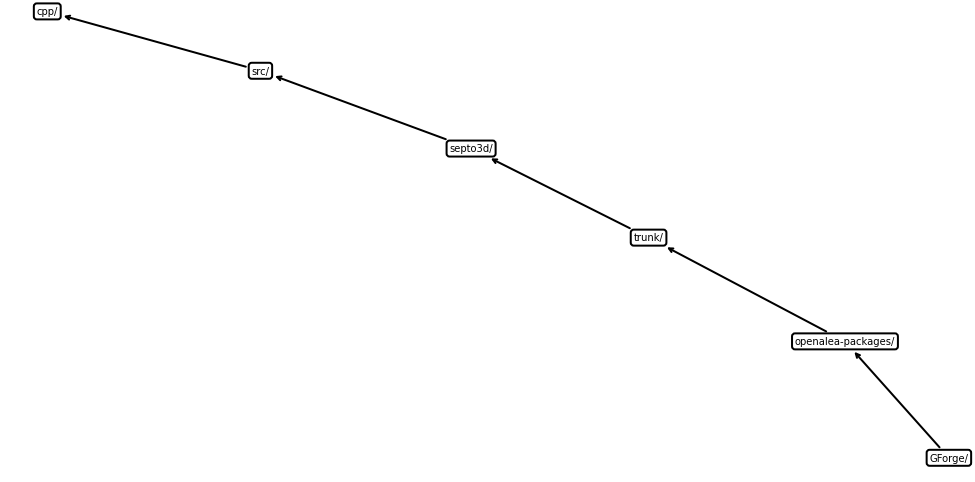

In [19]:
from vplants.autowig.asg import AbstractSemanticGraph
asg = AbstractSemanticGraph()
cwd = asg.add_directory(cwd)
asg

### Generation of Python bindings for C libraries
# Toward an automatic process
#### Building the ASG

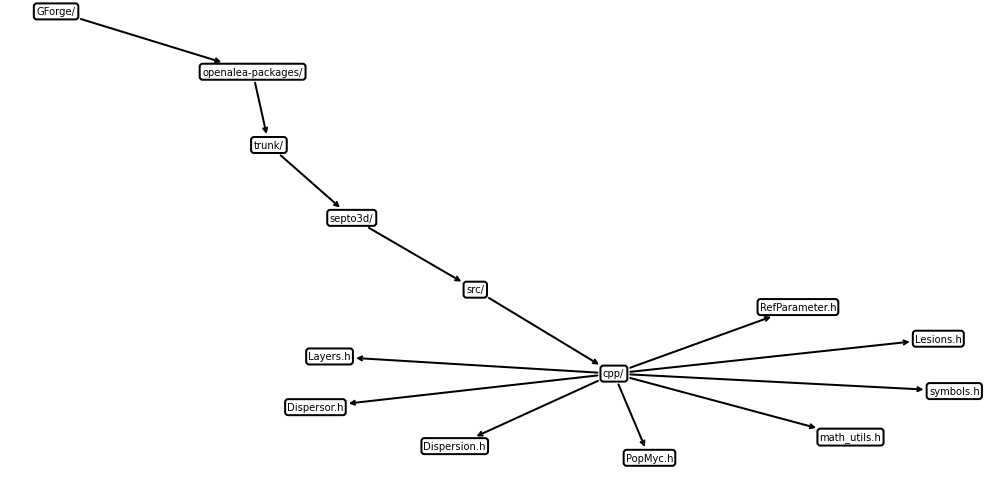

In [21]:
headers = cwd.glob('*.h', on_disk=True)
asg

### Generation of Python bindings for C libraries
# Toward an automatic process
#### Building the ASG

In [21]:
'::'

'::'

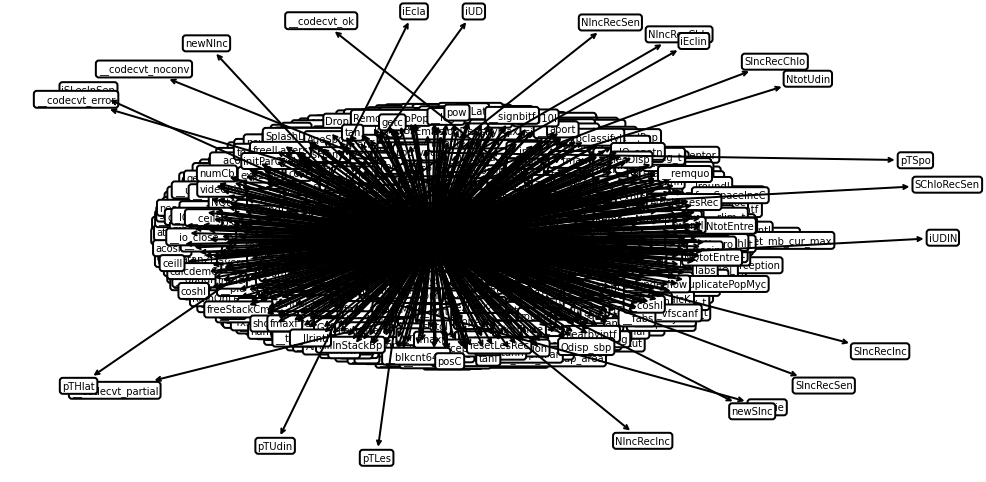

In [22]:
cwd.parse(side_effect=False, language='c')
asg

### Generation of Python bindings for C libraries
# Toward an automatic process
#### Building the ASG

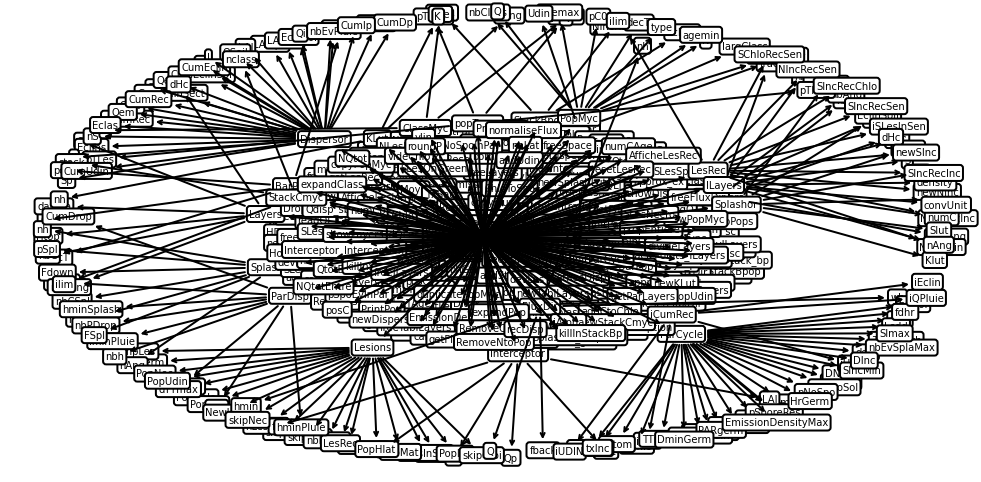

In [23]:
asg.clean()
asg.to_object(func2method=False)
asg

$882$ nodes against $2088$ nodes once cleaned.

### Generation of Python bindings for C libraries
# Toward an automatic process
#### The Boot.Python traversal

Once source files have been parsed, we need to generate the wrappers of each enumeration, structure, variable, and functions.

In [24]:
'/home/pfernique/Desktop/GForge'

'/home/pfernique/Desktop/GForge'

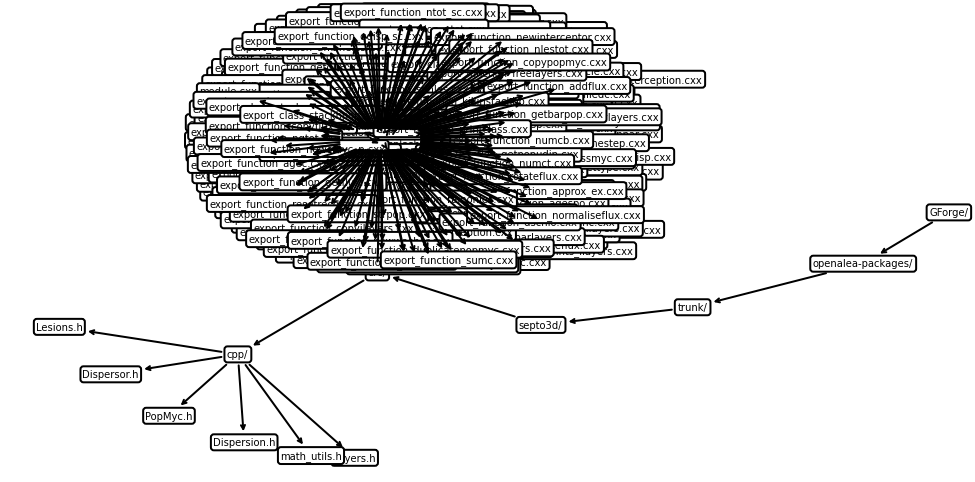

In [25]:
from vplants.autowig.boost_python import BoostPythonExportFileProxy, BoostPythonModuleFileProxy

asg.boost_python(directory=cwd.parent.globalname + 'boost_python')
asg

### Generation of Python bindings for C libraries
# Toward an automatic process
#### The Boot.Python traversal

The `BoostPythonExportFileProxy` generates the wrapper source code.

In [26]:
asg['(.*)export_class_splashlut.cxx'].pop()

/home/pfernique/Desktop/GForge/openalea-packages/trunk/septo3d/src/boost_python/export_class_splashlut.cxx

### Generation of Python bindings for C libraries
# Toward an automatic process
#### The Boot.Python traversal

The `BoostPythonModuleFileProxy` executes the wrappers

In [27]:
asg['(.*)module.cxx'].pop()

/home/pfernique/Desktop/GForge/openalea-packages/trunk/septo3d/src/boost_python/module.cxx

### Generation of Python bindings for C libraries
# The automatic process

In [28]:
from vplants.autowig.asg import AbstractSemanticGraph
asg = AbstractSemanticGraph()
cwd = asg.add_directory(cwd.globalname)
headers = cwd.glob('*.h', on_disk=True)

In [29]:
cwd.parse(side_effect=False, language='c')
asg.clean()
asg.to_object(func2method=False)

In [30]:
from vplants.autowig.boost_python import BoostPythonExportFileProxy
import re

class Septo3dExportfileProxy(BoostPythonExportFileProxy):
    
    def include(self, include):
        return "<" + re.sub("(.*)src/cpp(.*)", r"septod3d\2", include) + ">"
    
asg.boost_python(directory=cwd.parent.globalname+'boost_python', export_proxy=Septo3dExportfileProxy)

### Generation of Python bindings for C libraries
# The automatic process

In [31]:
asg['(.*)export_class_splashlut.cxx'].pop()

/home/pfernique/Desktop/GForge/openalea-packages/trunk/septo3d/src/boost_python/export_class_splashlut.cxx

# Generation of *Python* bindings for *C++* libraries

### Generation of *Python* bindings for *C++* libraries
# The *C++* language
#### Principle

*C++* is a super-set of *C* language that is an object-oriented language such as *Python*.

*C++* inherits most of *C*'s syntax. 
Major changes are the introduction of:

* namespaces,
* classes,
* templates,

    * variables,
    * functions,
    * classes.
    
A simple *C++* library is a *C++* library without templates.

### Generation of *Python* bindings for *C* libraries
# The *C++* language and *Python* bindings
#### Namespaces

Namespaces allow us to group named entities that otherwise would have global scope into narrower scopes, giving them namespace scope. 
This allows organizing the elements of programs into different logical scopes referred to by names.

In [32]:
HTML(highlight('namespace library_name\n{\n\tint cpp_variable_name;\n}', CppLexer(), HtmlFormatter(full = True)))

These namespaces can be wrapped in python using the file system tree.

### Generation of *Python* bindings for *C* libraries
# The *C++* language and *Python* bindings
#### User defined types - classes

A class is a user defined type or data structure declared with keyword class that has fields and methods as its members whose access is governed by the three access specifiers private, protected or public.

In [33]:
HTML(highlight('class cpp_parent_class_name {};\n\n class cpp_child_class_name : public cpp_parent_class_name\n{\n\tpublic:\n\t\tcpp_child_class_name(const double& _cpp_field_name_1);\n\t\t~cpp_child_class_name();\n\n\t\tint cpp_get_field_0_name() const;\n\t\tvoid cpp_set_field_0_name(const int& _cpp_field_name_0);\n\n\tprotected:\n\t\tint cpp_field_name_0;\n\t\tconst double cpp_field_name_1;\n};', CppLexer(), HtmlFormatter(full = True)))

### Generation of *Python* bindings for *C* libraries
# The *C++* language and *Python* bindings
#### User defined types - classes

These structures are wrapped using following *Boost.Python* code:

In [39]:
HTML(highlight('boost::python::class_< cpp_parent_class_name, cpp_parent_class_name * >\n\t("py_parent_class_name", boost::python::no_init)\n\t;\n\nboost::python::class_< cpp_child_class_name, cpp_child_class_name *, boost::python::bases< cpp_parent_class_name > >\n\t("py_child_class_name", boost::python::no_init)\n\t.def(boost::python::init< double >())\n\t.def(\"py_get_field_0_name\", &cpp_child_class_name::cpp_get_field_0_name)\n\t.def(\"py_set_field_0_name\", &cpp_child_class_name::cpp_set_field_0_name)\n\t;', CLexer(), HtmlFormatter(full = True)))

Simple *C++* libraries are therefore wrapped in the same way as *C* libraries

### Generation of Python bindings for *C++* libraries
# The automatic process

In [35]:
from vplants.autowig.asg import AbstractSemanticGraph
asg = AbstractSemanticGraph()
cwd = asg.add_directory(cwd.globalname)
headers = cwd.glob('*.h', on_disk=True)

In [36]:
cwd.parse(side_effect=False, language='c')
asg.clean()
asg.to_object(func2method=True)

In [37]:
from vplants.autowig.boost_python import BoostPythonExportFileProxy
import re

class Septo3dExportfileProxy(BoostPythonExportFileProxy):
    
    def include(self, include):
        return "<" + re.sub("(.*)src/cpp(.*)", r"septod3d\2", include) + ">"
    
asg.boost_python(directory=cwd.parent.globalname+'boost_python', export_proxy=Septo3dExportfileProxy)

### Generation of Python bindings for *C++* libraries
# The automatic process

In [38]:
asg['(.*)export_class_splashlut.cxx'].pop()

/home/pfernique/Desktop/GForge/openalea-packages/trunk/septo3d/src/boost_python/export_class_splashlut.cxx

### Technological Development Action (ADT)
# Scientific COmpOnents for plant Phenotyping (SCOOP)
#### Conclusion

We developped the *autowig* package that enables the automatic generation of *Python* wrappers for :

* *C* libraries,
* Simple *C++* libraries.

We cannot wrap complex *C++* libraries due to a problem in *libclang* **ASTs** generation.
Since this problem is not encountered in *Clang* two options are considered:

* correct the *libclang*,
* wrap *Clang* in *Python* using the *autowig* package.

We are know incorporating *autowig* in the deploying chain of *OpenAlea* packages.